In [631]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import missingno as msnum 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [632]:
df = pd.read_csv(r'C:\Users\Dhruvil\Downloads\titanic\train.csv')
pd.set_option('display.max_rows',500)
# pd.set_option('display.max_columns',50)
pd.set_option('display.min_rows', 20)
# pd.set_option('display.expand_frame_repr', True)

In [633]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [634]:
print(df.shape)

(891, 12)


In [635]:
for i in df.columns:
    print(df[i].value_counts())

1      1
599    1
588    1
589    1
590    1
591    1
592    1
593    1
594    1
595    1
      ..
296    1
297    1
298    1
299    1
300    1
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
                                                  ..
Lewy, Mr. Ervin G                                  1
Hanna, Mr. Mansour           

In [636]:
duplicate= df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [637]:
# newdf=df.drop('PassengerId',axis=1)

In [638]:
df.shape

(891, 12)

In [639]:
print(df.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


In [640]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [641]:
newdf=df.drop('Cabin',axis=1)

In [642]:
newdf.shape

(891, 11)

In [643]:
# mean_value= newdf['Age'].median()
# print(mean_value)

In [644]:
newdf['Age'].fillna(method= 'ffill',inplace=True )

In [645]:
# newdf('Age').fillna(value = mean_value,inplace=True)
# newdf['Age'].fillna(int(df['Age'].median()), inplace=True)

In [646]:
newdf.isnull().sum()*100/len(newdf)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [647]:
print(newdf.groupby('Embarked').size())

Embarked
C    168
Q     77
S    644
dtype: int64


In [648]:
df.to_csv("temp.csv")

<AxesSubplot:>

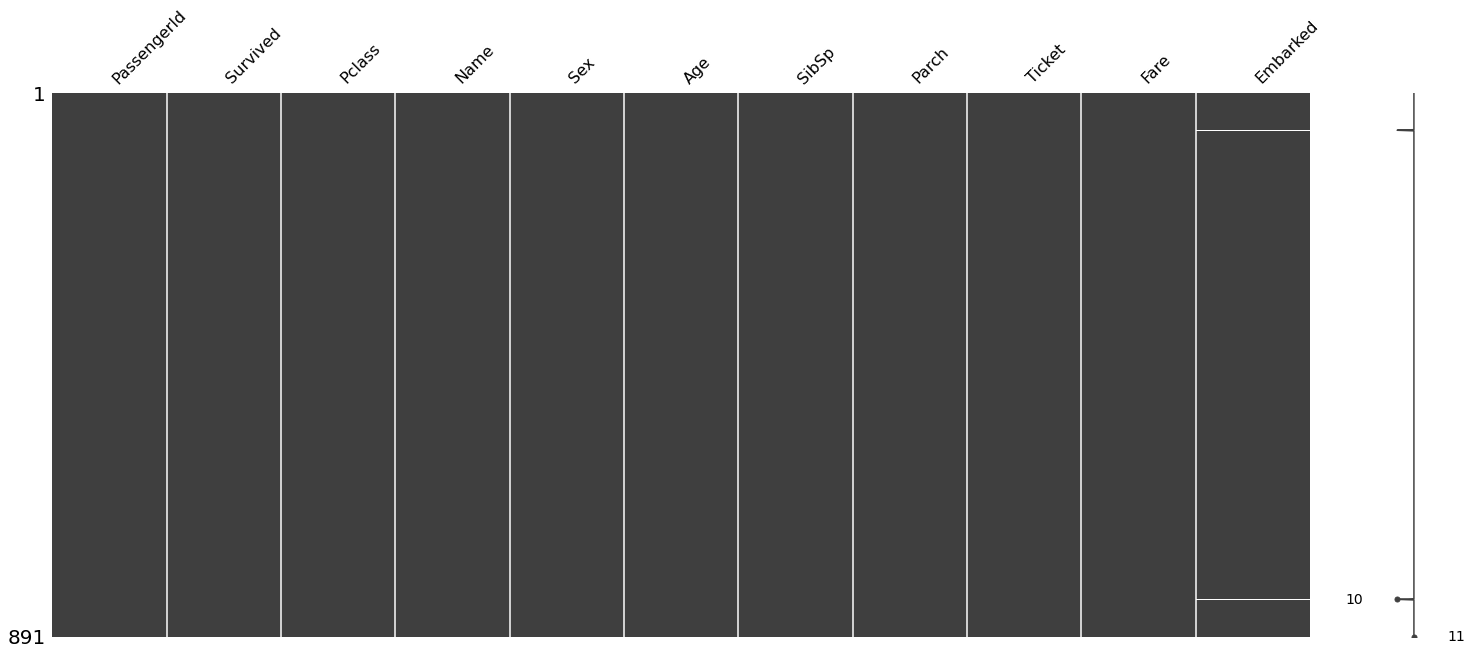

In [649]:
msnum.matrix(newdf)

In [650]:
newdf['Embarked'].fillna(newdf['Embarked'].mode()[0], inplace=True)

In [651]:
newdf.shape

(891, 11)

<AxesSubplot:>

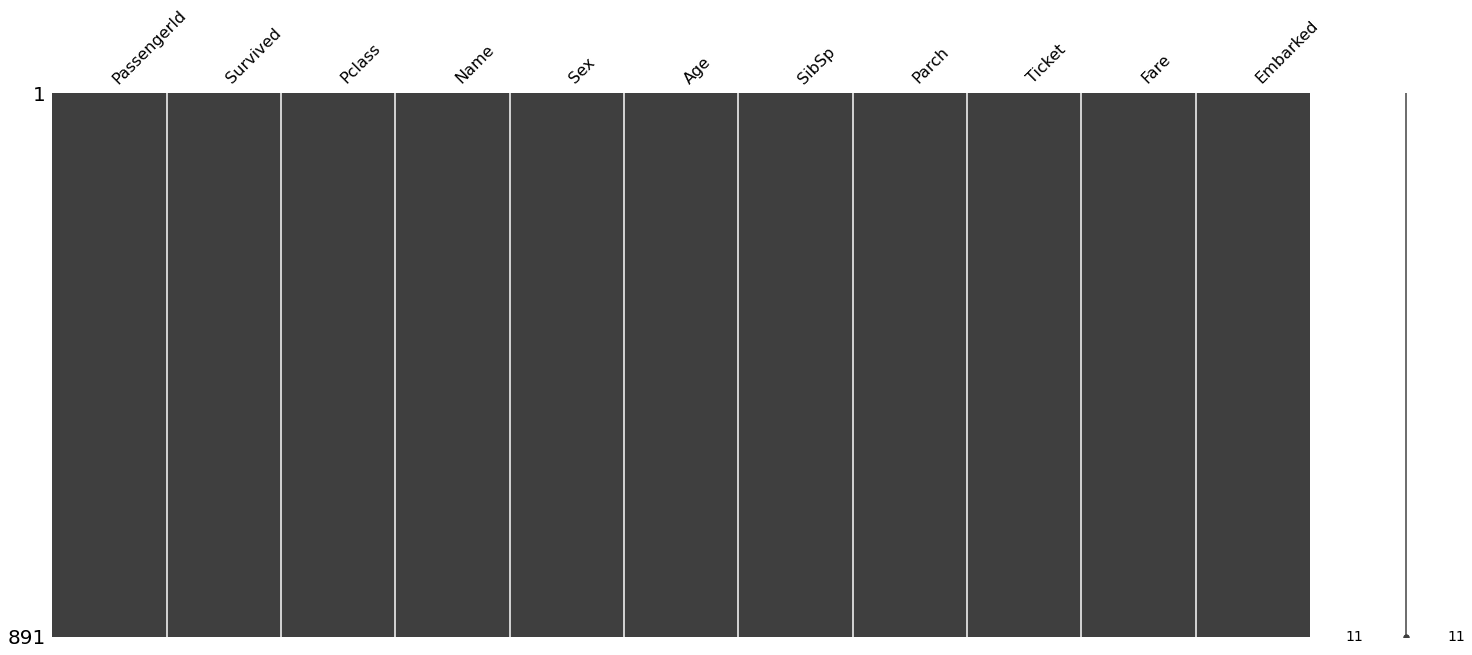

In [652]:
msnum.matrix(newdf)

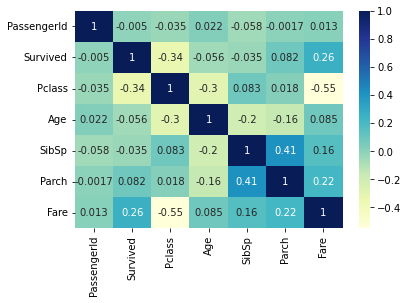

In [653]:
plot = sns.heatmap(newdf.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [654]:
print(newdf.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.870561    0.523008   
std     257.353842    0.486592    0.836071   14.597668    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.000000    0.000000   
75%     668.500000    1.000000    3.000000   39.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


<AxesSubplot:xlabel='Survived', ylabel='count'>

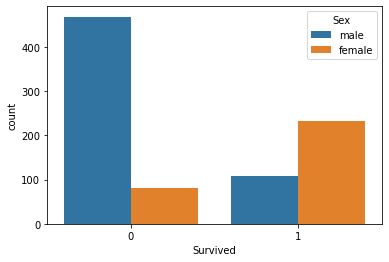

In [655]:
sns.countplot(x='Survived' ,hue='Sex', data=newdf)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

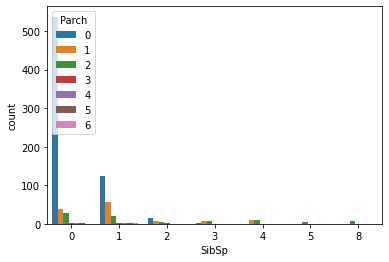

In [656]:
sns.countplot(x='SibSp' ,hue='Parch', data=newdf)

<AxesSubplot:xlabel='Survived', ylabel='count'>

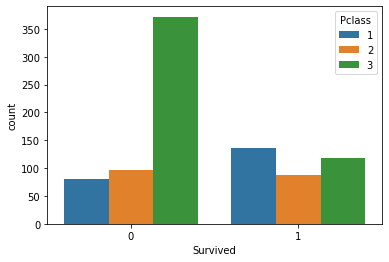

In [657]:
sns.countplot(x='Survived' ,hue='Pclass', data=newdf)

In [658]:
newdf=newdf.drop('Ticket',axis=1)

In [659]:
newdf.shape

(891, 10)

In [660]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,54.0,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [661]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in newdf.columns:
    if newdf[col].dtypes == 'object':
        newdf[col] = le.fit_transform(newdf[col])

In [662]:
x=newdf.drop(['Survived'], axis=1)
y=newdf['Survived']

In [663]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,108,1,22.0,1,0,7.2500,2
1,2,1,190,0,38.0,1,0,71.2833,0
2,3,3,353,0,26.0,0,0,7.9250,2
3,4,1,272,0,35.0,1,0,53.1000,2
4,5,3,15,1,35.0,0,0,8.0500,2
5,6,3,554,1,54.0,0,0,8.4583,1
6,7,1,515,1,54.0,0,0,51.8625,2
7,8,3,624,1,2.0,3,1,21.0750,2
8,9,3,412,0,27.0,0,2,11.1333,2
9,10,2,576,0,14.0,1,0,30.0708,0


In [664]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [665]:
log = LogisticRegression()
log.fit(x_train, y_train)

c:\Users\Dhruvil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [666]:
y_pred_lr = log.predict(x_test)
y_pred_lr

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [667]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



In [668]:
print(confusion_matrix(y_test,y_pred_lr))

[[93 17]
 [23 46]]
